In [1]:
import pandas as pd

In [2]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')
hr_data.rename(columns={'sales':'department'},inplace=True)

In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [9]:
hr_data['department'] = le.fit_transform(hr_data.department)

In [10]:
hr_data['salary'] = le.fit_transform(hr_data.salary)

In [11]:
hr_data.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
13141,0.8,0.82,4,271,4,0,0,0,7,1


In [12]:
from sklearn.cluster import KMeans

In [13]:
cluster_algo = KMeans(n_clusters=3)

In [18]:
cluster_algo.fit(hr_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
hr_data_subset = hr_data[['department','salary']]

In [23]:
labels = cluster_algo.predict(hr_data)

In [24]:
hr_data[labels == 3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(hr_data_subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
labels = kmeans.predict(hr_data_subset)

Text(0, 0.5, 'salary')

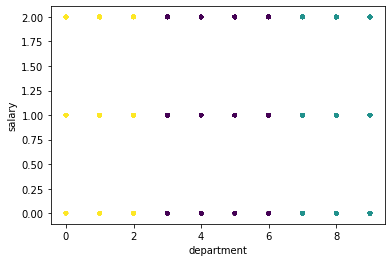

In [30]:
plt.scatter(x=hr_data_subset.department, y=hr_data_subset.salary, s=10, c=labels)
plt.xlabel('department')
plt.ylabel('salary')